## Thank you for opening this notebook!!

### Main objective of this kernel is to learn logistic regression, decision tree, naive bayes, random forest and SVM classifier.


### What is a classifier?
* A classifier is a machine learning model that is used to discriminate different objects based on certain features.
* Machine Learning Classifiers can be used to predict. Given example data (measurements), the algorithm can predict the class the data belongs to.
* Start with training data. Training data is fed to the classification algorithm. After training the classification algorithm (the fitting function), you can make predictions.





### We are going to use the Red Wine Quality dataset.
This datasets is related to red variants of the Portuguese "Vinho Verde" wine.

### Let's begin!

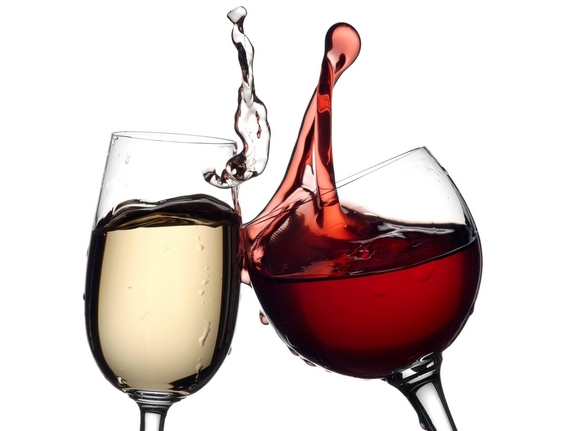

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from IPython.display import display, Image

In [ ]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
sns.pairplot(df)

In [ ]:
sns.countplot(x='quality',data=df)

In [ ]:
sns.boxplot('quality','fixed acidity',data=df)

In [ ]:
sns.boxplot('quality', 'volatile acidity', data = df)

In [ ]:
sns.boxplot('quality', 'citric acid', data = df)

In [ ]:
sns.boxplot('quality', 'residual sugar', data = df)

In [ ]:
sns.boxplot('quality', 'chlorides', data = df)

In [ ]:
sns.boxplot('quality', 'free sulfur dioxide', data = df)

In [ ]:
sns.boxplot('quality', 'total sulfur dioxide', data = df)

In [ ]:
sns.boxplot('quality', 'density', data = df)

In [ ]:
sns.boxplot('quality', 'pH', data = df)

In [ ]:
sns.boxplot('quality', 'sulphates', data = df)

In [ ]:
sns.boxplot('quality', 'alcohol', data = df)

In [ ]:
#New column is created as NewQuality. It has the values 1,2, and 3. 
#1 - Bad quality
#2 - Average quality
#3 - Excellent quality
#Split the dataset 
#1,2,3 - Bad quality
#4,5,6,7 - Average quality
#8,9,10 - Excellent quality

#Create an empty list called NewQuality
NewQuality = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        NewQuality.append('1')
    elif i >= 4 and i <= 7:
        NewQuality.append('2')
    elif i >= 8 and i <= 10:
        NewQuality.append('3')
df['NewQuality'] = NewQuality

In [ ]:
x = df.iloc[:,:11]
y = df['NewQuality']

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

### Training and testing data is used to perform machine learning algorithm

### 1. Logistic Regression
#### Here the output variable can have more than two possible discrete outputs. Given below is implementation of the Logistic regression to make predictions on the dataset.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [ ]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

#### Accuracy of the logistic regression model is 98.125%

### 2. Decision tree
#### Decision tree is the most powerful and popular tool for classification and prediction. Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [ ]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

#### Accuracy of the Decision tree is 98.125%

### 3. Naive Bayes
#### Principle of Naive Bayes Classifier: A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task.It is based on the Bayes theorem. Bayes Theorem: P(A/B) = P(B/A)*P(A)/P(B)
#### Types of Naive Bayes Classifier:

* Multinomial Naive Bayes:
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

* Bernoulli Naive Bayes:
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

* Gaussian Naive Bayes:
When the predictors take up a continuous value, we assume that these values are sampled from a gaussian distribution.

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

In [ ]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

#### Accuracy of the Naive Bayes is 95.3125%

### 4. Random Forest 

#### A Random Forest is an ensemble technique capable of performing both regression and classification tasks. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [ ]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

#### Accuracy of random forest is 97.8125%

### 5. SVM classifier

Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection.

In [ ]:
from sklearn.svm import SVC

In [ ]:
#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC()
lin_svc.fit(X_train, y_train)
lin_svc=rf.predict(X_test)

In [ ]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

#### Accuracy of SVM classifier is 97.8125%

## I hope this kernal is helpful for you. Your UPVOTE means alot to me!!

## Thank you !!